In [3]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf

# Reading the Data

In [4]:
df=pd.read_csv(
    os.path.join('data-toxic-comment-classification-challenge','train.csv','train.csv')
)

In [5]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
df[df.columns[2:]]

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [7]:
df[df['toxic']==1].head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0


# Tokenizing the data

In [8]:
from tensorflow.keras.layers import TextVectorization

In [9]:
X=df['comment_text']
y=df[df.columns[2:]].values

In [10]:
MAX_FEATURES=200000 #number of words in the vocab

In [11]:
vector=TextVectorization(max_tokens=MAX_FEATURES, 
                         output_sequence_length=2000,
                        output_mode='int')

In [12]:
vector.adapt(X.values)

In [13]:
vector.get_vocabulary() #the word with valued int

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [14]:
vector('The gym')

<tf.Tensor: shape=(2000,), dtype=int64, numpy=array([    2, 13261,     0, ...,     0,     0,     0], dtype=int64)>

In [15]:
vector_txt=vector(X.values)

In [16]:
vector_txt

<tf.Tensor: shape=(159571, 2000), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]], dtype=int64)>

# Preparing datapipeline

In [17]:
#map,cache,shuffle,batch,prefetch- basic for setting the datapipeline
dataset=tf.data.Dataset.from_tensor_slices((vector_txt,y))
dataset=dataset.cache()
dataset=dataset.shuffle(160000)
dataset=dataset.batch(16)
dataset=dataset.prefetch(8) #pervent the bootlenecks

In [18]:
bacth_X,batch_y=dataset.as_numpy_iterator().next()

In [19]:
bacth_X

array([[   71,    22,    42, ...,     0,     0,     0],
       [   23,     7,   105, ...,     0,     0,     0],
       [  118,  1086,     7, ...,     0,     0,     0],
       ...,
       [   23,     2,   101, ...,     0,     0,     0],
       [   87, 29576,   250, ...,     0,     0,     0],
       [ 2932,  4198,  1059, ...,     0,     0,     0]], dtype=int64)

In [20]:
train=dataset.take(int(len(dataset)*.7))
val=dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test=dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [21]:
train_generator=train.as_numpy_iterator()
train_generator.next()

(array([[ 6022,   117,    13, ...,     0,     0,     0],
        [22683,  1354,  2119, ...,     0,     0,     0],
        [  797,     8,   424, ...,     0,     0,     0],
        ...,
        [ 1458,    49,    50, ...,     0,     0,     0],
        [  346,    13,    40, ...,     0,     0,     0],
        [84988, 29377,  2365, ...,     0,     0,     0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

# Create sequential model

In [22]:
from tensorflow.keras.models import Sequential #importing sequential
from tensorflow.keras.layers import LSTM,Dropout,Bidirectional,Dense,Embedding

In [23]:
model=Sequential()
#Create embedding layer
model.add(Embedding(MAX_FEATURES+1,32))
#Creating LSTM layer-where bidirectional allows to pass the data in both forward and backward
model.add(Bidirectional(LSTM(32,activation='tanh')))
#Feature Extractor fully connected layers
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(6,activation='sigmoid'))

In [25]:
# model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),optimizer='Adam')
model.compile(
  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer='Adam'
)

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [27]:
history=model.fit(train,epochs=1,validation_data=val)

C:\Users\ragur\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


6981/6981 [==============================] - 14008s 2s/step - loss: 0.0621 - val_loss: 0.0456


In [28]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

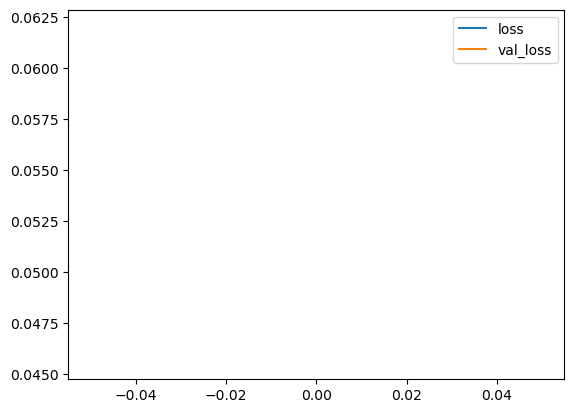

In [29]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [36]:
batch=test.as_numpy_iterator().next()

In [37]:
batch_X,batch_y=test.as_numpy_iterator().next()

In [39]:
batch_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [40]:
(model.predict(batch_X)>0.5).astype(int)

1/1 [==============================] - 1s 578ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [41]:
input_text=vector('You freaking suck')

In [35]:
# model.predict(np.expand_dims([input_text]))

In [43]:
res=model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 0s 61ms/step


# Evaluation

In [44]:
from tensorflow.keras.metrics import Precision,Recall, CategoricalAccuracy

In [46]:
pre=Precision()
re=Recall()
acc=CategoricalAccuracy()

In [47]:
for batch in test.as_numpy_iterator():
    #Unpack the batch
    X_true,y_true=batch
    #Make prediction
    yhat=model.predict(X_true)
    
    #flateen the predictions
    y_true=y_true.flatten()
    yhat=yhat.flatten()
    
    pre.update_state(y_true,yhat)
    re.update_state(y_true,yhat)
    acc.update_state(y_true,yhat)

1/1 [==============================] - 0s 69ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 81ms/step


1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 77ms/step


1/1 [==============================] - 0s 74ms/step


In [48]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision:0.8257073163986206,Recall:0.6721637845039368,Accuracy:0.4453360140323639


# Test 

In [49]:
!pip install gradio jinja2

     ---------------------------------------- 13.8/13.8 MB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 55.5/55.5 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 84.5/84.5 kB 2.4 MB/s eta 0:00:00
     -------------------------------------- 812.8/812.8 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 56.9/56.9 kB 3.1 MB/s eta 0:00:00
     ------------------------------------ 200.2/200.2 kB 759.9 kB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 85.0/85.0 kB 1.2 MB/s eta 0:00:00
     ------------------------------------ 101.4/101.4 kB 836.7 kB/s eta 0:00:00


In [50]:
import gradio as gr

In [51]:
model.save('toxicity.h5')

In [52]:
model=tf.keras.models.load_model('toxicity.h5')

In [53]:
input_str=vector('Fuck you buddy')

In [54]:
res=model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 0s 418ms/step


In [55]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [56]:
res

array([[0.9980882 , 0.22823742, 0.98310906, 0.00720197, 0.90958786,
        0.08367159]], dtype=float32)

In [57]:
def score_comment(comment):
    vectorzied_comment=vector([comment])
    results=model.predict(vectorzied_comment)
    
    text=''
    for idx,col in enumerate(df.columns[2:-1]):
        text+='{}: {}\n'.format(col,results[0][idx]>0.5)
    return text

In [58]:
interface=gr.Interface(fn=score_comment, inputs=gr.inputs.Textbox(lines=2,placeholder='Comment to score'),
                      outputs='text')

C:\Users\ragur\anaconda3\lib\site-packages\gradio\inputs.py:26: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\ragur\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\ragur\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)


In [59]:
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860

Setting up a public link... we have recently upgraded the way public links are generated. If you encounter any problems, please report the issue and downgrade to gradio version 3.13.0
.
Running on public URL: https://001afd95-1df8-40be.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


1/1 [==============================] - 0s 62ms/step
